# Pairs Trading : Candidate Model
This model is a candidate model

In [42]:
#All imports 
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(107)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time 
import datetime
from Pairs_Library import *
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [43]:
#Reload library
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
btc_data = get_historical_data(coin = 'bitcoin', vs_curr='usd',start_date='01/01/2020', end_date = '01/02/2021')
eth_data = get_historical_data(coin = 'ethereum', vs_curr='usd',start_date='01/01/2020', end_date = '01/02/2021')

In [45]:
btc_data.head()

,date,price,returns,cum_returns
0,2020-01-02,7193.754668,NaN,NaN
1,2020-01-03,6963.853354,-0.031958,-0.031958
2,2020-01-04,7300.346935,0.048320,0.014817
3,2020-01-05,7351.377053,0.006990,0.021911
4,2020-01-06,7349.972248,-0.000191,0.021716


In [46]:
eth_data.head()

,date,price,returns,cum_returns
0,2020-01-02,130.484685,NaN,NaN
1,2020-01-03,127.045258,-0.026359,-0.026359
2,2020-01-04,133.702649,0.052402,0.024662
3,2020-01-05,134.136883,0.003248,0.027989
4,2020-01-06,135.005714,0.006477,0.034648


# Candidate Model Draft
This is the candidate model

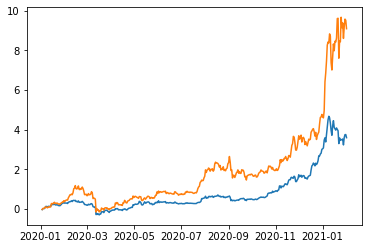

In [47]:
asset1 = btc_data
asset2 = eth_data

plt.plot(asset1['date'],asset1['cum_returns'])
plt.plot(asset2['date'],asset2['cum_returns'])
plt.show()

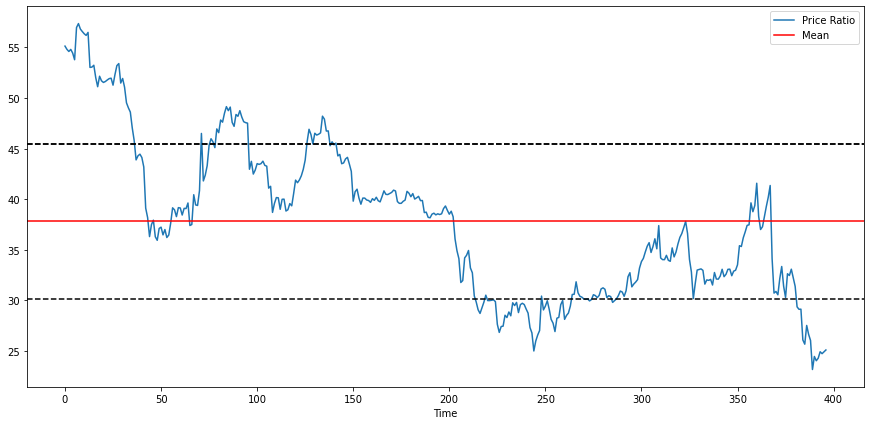

In [48]:
plot_ratio(btc_data, eth_data)

In [50]:
get_pair_stats(btc_data,eth_data)


 Asset1 mean: 0.004646093061271675 
 Asset1 standard deviation: 0.03857776016245098 
 Asset1 max: 0.14767083224037414 
 Asset1 min: -0.35190269361185134 
 Asset2 mean: 0.007362072370416374 
 Asset2 standard deviation: 0.05337139930377766 
 Asset2 max: 0.24341711353640139 
 Asset2 min: -0.43054747092585566 
 Cointergation p_value: 1.0594568846659954e-07 
 Cointegrated? True


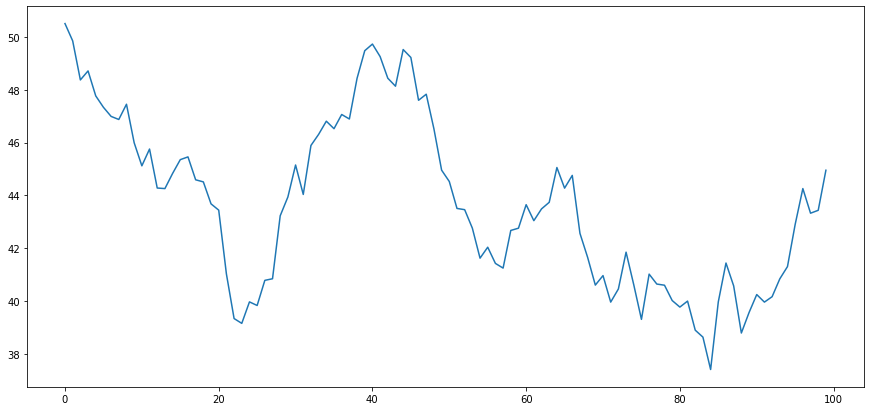

In [39]:
# Normally dsitributed returns 
Xreturns = np.random.normal(0, 1, 100)
# sum them and shift all the prices up
X = pd.Series(np.cumsum(Xreturns), name='X') + 50
X.plot(figsize=(15,7))
plt.show()

In [41]:
score, pvalue, _ = coint(btc_data['returns'].fillna(value=0),eth_data['returns'].fillna(value=0))
pvalue

1.0594568846659954e-07